## Systems "in control" and "out of control".
Mathematically control is all about the poles.  If the real part of all the poles are on the left hand side of the complex plane (less than zero), then the system is in control.  The system can be in control even if the poles are complex, as long as the real part is less than zero.  A system is out of control if any pole has a real part that is equal to or greater than zero.

## What does being in control really mean?

A system is in control if you input a step function and the system's output eventually settles to a constant value.  (Sometimes an underdamped system can take "too long" to settle to a constant value and this situation informally known as being out of control.) 

## Example 5 system in control  second order highpass
$H(s)=\frac{s^2}{s^2+2\times.5\times 10 s+100}$

 

s**2/(s**2 + 10*s + 100)
[(-5-8.660254037844387j), (-5+8.660254037844387j)]


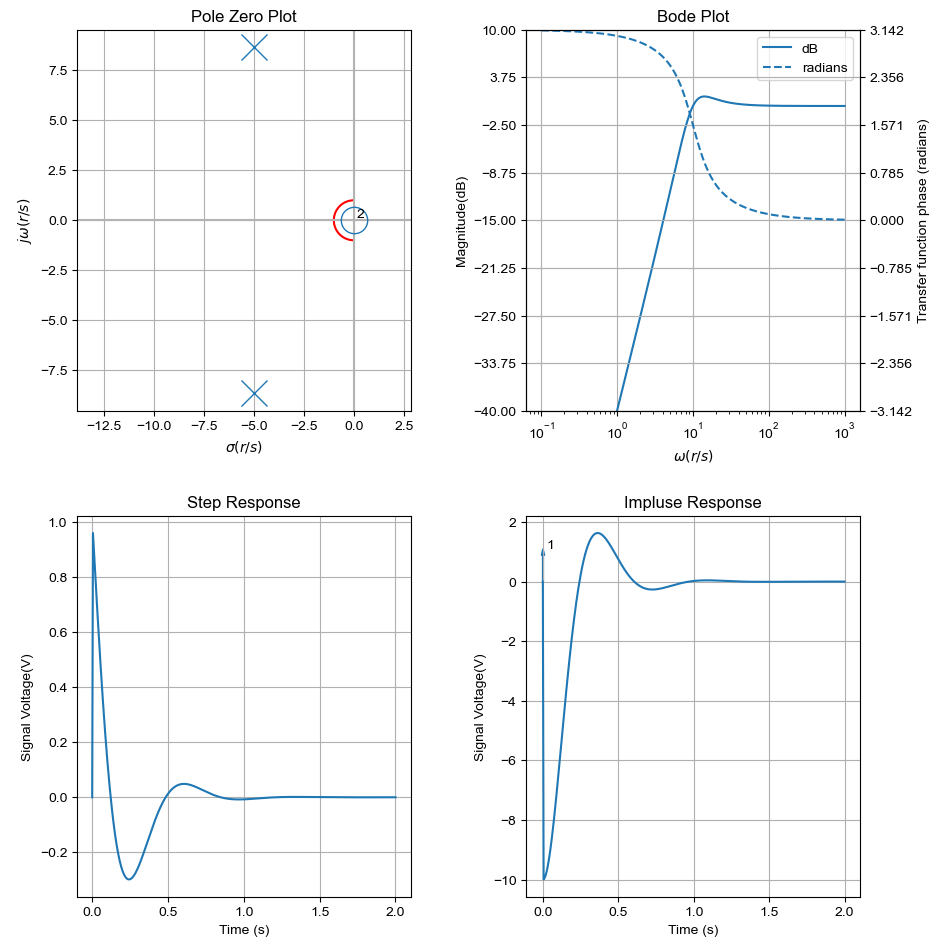

In [1]:
from lcapy import s, j, pi, f, transfer ,t, cos,sin,exp
from matplotlib.pyplot import savefig
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
from numpy import logspace
from numpy import linspace
import numpy as np
from matplotlib.pyplot import style
wo=10
H=transfer(s**2/(s**2+2*.5*wo*s+wo**2)).simplify()
print(H.simplify())
print(H.poles(aslist=True).cval)
G=1/s 
F=H*G
ft=F(t, causal=True) 
#impluse
hti=H(t, causal=True) 
# create half circle for pole zero
theta=linspace(np.pi/2.0,6*np.pi/4.0,num=50)
x=np.cos(theta)
y=np.sin(theta)

figs,((ax1,ax2),(ax3,ax4)) = subplots(2,2,figsize=(10,10))

ax1.plot(x,y,color='red')
ax1=H.plot(axes=ax1) 
ax1.set_xlabel("$\sigma (r/s)$") 
ax1.set_ylabel("$j\omega (r/s)$")
ax1.set_title("Pole Zero Plot")
ax1.set_xlim([-12,1])

A = H.subs(j * f)
fv = logspace(-1, 3, 400)
tv = linspace(-.001, 2, 400)
ax2=A.plot(fv, log_frequency=True,axes=ax2,ylabel="Magnitude(dB)",xlabel='$\omega (r/s)$')
ax2[0].set_title("Bode Plot")
ax2[0].set_ylim([-40,10])
ax3=ft.plot(tv,axes=ax3,ylabel='Signal Voltage(V)')
ax3.set_title("Step Response")
 
ax4=hti.plot(tv,axes=ax4,ylabel='Signal Voltage(V)')
ax4.set_title("Impluse Response")

figs.tight_layout(pad=2.5, w_pad=2.5, h_pad=2.5)
style.use('seaborn-v0_8') 


We see from the pole-zero plot that the pole are are all on the left hand side of the complex plane. We see two zeros, at zero.  There is one pair of complex poles, so we should expect some oscillation in the step response. We see a resonant peak in the frequency response as well caused by the complex poles. There does not ave to be a resonant peak int he Bode plot to have complex poles. In a second order system if the gain is great than -6dB, there are complex poles. The step response does have some oscillation or ringing. The step response and the impulse response both settle to a constant value so the system is in control.  You can see the delta function in the impulse response.